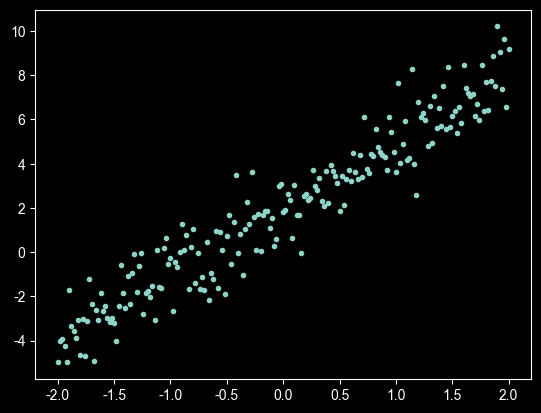

In [39]:
import tensorflow as tf
from matplotlib import pyplot as plt
# 设置matplotlib使用黑体显示中文
plt.rcParams['font.family'] = 'Arial Unicode MS' # 设置字体

# 设定正确的权重和偏置 （一会想办法去把这两个参数去拟合出来)
TRUE_W = 3.0
TRUE_B = 2.0

# 指定数据数量
NUM_EXAMPLES = 201

x = tf.linspace(-2, 2, NUM_EXAMPLES)  # 生成-2到2之间的201个均匀分布的
x = tf.cast(x, tf.float32)  # 转换为float32类型

# 生成噪声数据
noise = tf.random.normal(shape=[NUM_EXAMPLES], mean=0.0, stddev=1.0)  # 添加噪声

# 定义一个函数
def f(x):
    return x * TRUE_W + TRUE_B

y = f(x) + noise  # 产生扰动后的y值
plt.plot(x, y, '.')  # 绘制数据点
plt.show()

In [40]:
class MyModel(tf.Module):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        # 初始化权重和偏置 实际之中应该是随机的
        self.w = tf.Variable(tf.random.normal(shape=[]))  # 标量权重
        self.b = tf.Variable(tf.random.normal(shape=[]))  # 标量偏置

    # 定义前向计算
    def __call__(self, x):
        return self.w * x + self.b

model = MyModel()
# 打印模型参数
print(f'模型参数:{model.variables}')

模型参数:(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.1330698>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.57530445>)


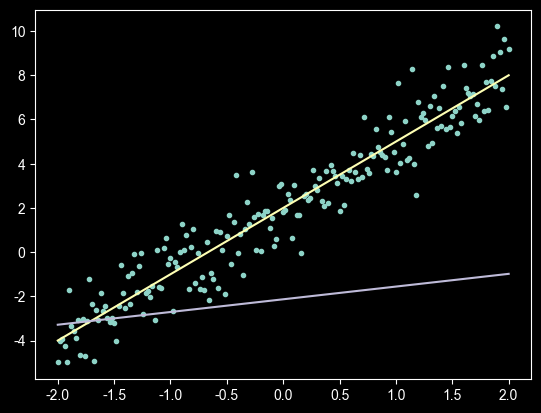

In [41]:
# 定义损失函数（均方误差）
def loss(y_true, y_pred):  # 参数是真实值和预测值 也可以叫做标签值和预测值（target_y,predicted_y）
    return tf.reduce_mean(tf.square(y_true - y_pred))

# 被手动扰动过的值
plt.plot(x,y,".",label="数据")
# 真实值
plt.plot(x,f(x),label="真实值")
# 初始模型预测值
plt.plot(x,model(x),label="初始模型预测")
plt.show()

In [42]:
# 定义训练模型
def train(model, x, y, learning_rate):
    with tf.GradientTape() as tape:  # 自动求导
        y_pred = model(x)  # 预测值
        current_loss = loss(y, y_pred)  # 计算损失 y是被扰动过点(给的数据集) y_pred是预测值（模型结果）
    # 计算梯度
    dw, db = tape.gradient(current_loss, [model.w, model.b]) # 传入损失函数和模型参数计算梯度
    # 更新权重和偏置（减去按学习率缩放的梯度）
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

In [43]:
# 收集一下 w 和 b 的变化过程
Ws, Bs = [], []

# 定义学习轮数
epoches = range(20)

# 定义一个报告函数
def report(model, epoch, loss):
    Ws.append(model.w.numpy())
    Bs.append(model.b.numpy())
    print(f'轮数:{epoch+1:03d}, 损失:{loss:.3f}, 权重:{model.w.numpy():.3f}, 偏置:{model.b.numpy():.3f}')

In [44]:
# 开始训练循环
for epoch in epoches:
    current_loss = train(model, x, y, learning_rate=0.1)
    report(model, epoch, current_loss)

轮数:001, 损失:25.995, 权重:1.229, 偏置:-1.310
轮数:002, 损失:16.199, 权重:1.707, 偏置:-0.652
轮数:003, 损失:10.323, 权重:2.056, 偏置:-0.125
轮数:004, 损失:6.771, 权重:2.311, 偏置:0.296
轮数:005, 损失:4.611, 权重:2.498, 偏置:0.633
轮数:006, 损失:3.287, 权重:2.634, 偏置:0.903
轮数:007, 损失:2.472, 权重:2.733, 偏置:1.119
轮数:008, 损失:1.968, 权重:2.806, 偏置:1.291
轮数:009, 损失:1.654, 权重:2.859, 偏置:1.429
轮数:010, 损失:1.458, 权重:2.898, 偏置:1.540
轮数:011, 损失:1.335, 权重:2.926, 偏置:1.628
轮数:012, 损失:1.258, 权重:2.947, 偏置:1.699
轮数:013, 损失:1.209, 权重:2.962, 偏置:1.756
轮数:014, 损失:1.178, 权重:2.973, 偏置:1.801
轮数:015, 损失:1.159, 权重:2.981, 偏置:1.837
轮数:016, 损失:1.147, 权重:2.987, 偏置:1.866
轮数:017, 损失:1.139, 权重:2.992, 偏置:1.889
轮数:018, 损失:1.134, 权重:2.995, 偏置:1.908
轮数:019, 损失:1.131, 权重:2.997, 偏置:1.922
轮数:020, 损失:1.129, 权重:2.999, 偏置:1.934


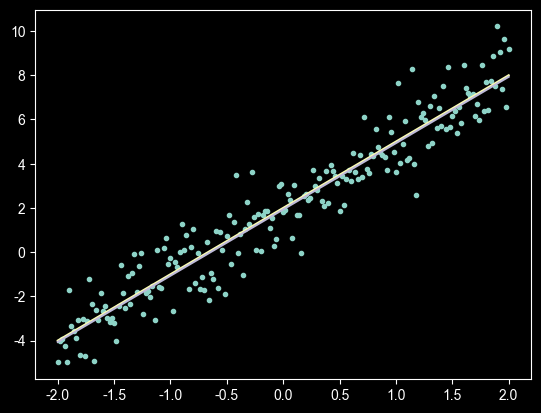

In [45]:
# 被手动扰动过的值
plt.plot(x,y,".",label="数据")
# 真实值
plt.plot(x,f(x),label="真实值")
# 初始模型预测值
plt.plot(x,model(x),label="初始模型预测")
plt.show() # 可以看到模型已经非常接近真实值了（通过被扰动的数据训练出来的）

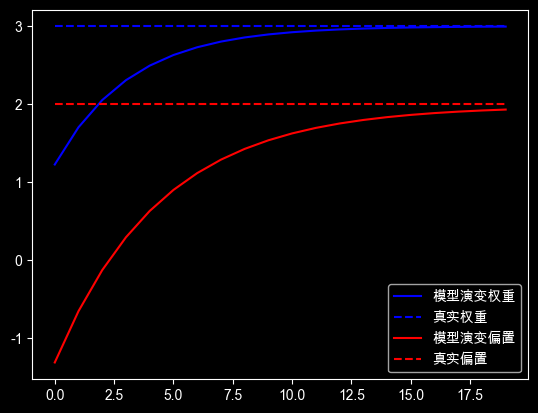

In [46]:
# 查看一下权重和偏置的变化过程
plt.plot(epoches, Ws, label='模型演变权重', color='blue')
plt.plot(epoches, [TRUE_W] * len(epoches), '--',
label="真实权重", color='blue')
plt.plot(epoches, Bs, label='模型演变偏置', color='red')
plt.plot(epoches, [TRUE_B] * len(epoches), "--",
label="真实偏置", color='red')
plt.legend()
plt.show()

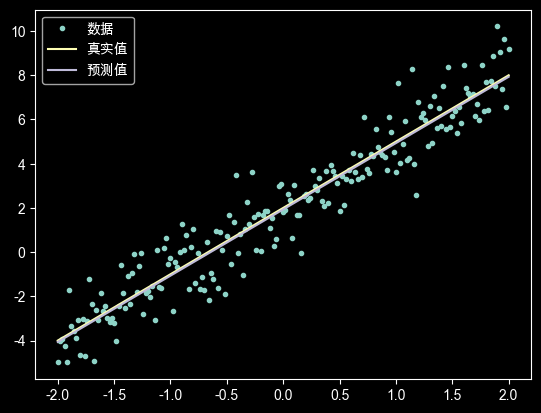

当前损失值: 1.127239


In [47]:
# 再次展示模型性能
plt.plot(x, y, '.', label="数据")
plt.plot(x, f(x), label="真实值")
plt.plot(x, model(x), label="预测值")
plt.legend() # 绘制图例
plt.show()
print("当前损失值: %1.6f" % loss(model(x), y).numpy())